Artur Kozubov, Kirill Komarov 54 Dataset.

## Phase 1

In [2]:
import pandas as pd

### 1.1

#### 1.1.A Analysis of data structures such as files, records.

In [3]:
connections = pd.read_csv(f'./data/connections.csv', delimiter='\t')
connections.info()
connections.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15155 entries, 0 to 15154
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ts                 15155 non-null  object 
 1   imei               15155 non-null  int64  
 2   mwra               15155 non-null  float64
 3   c.katana           15155 non-null  float64
 4   c.dogalize         15155 non-null  float64
 5   c.android.youtube  15155 non-null  float64
 6   c.android.chrome   15155 non-null  float64
 7   c.android.gm       15155 non-null  float64
 8   c.raider           15155 non-null  float64
 9   c.UCMobile.x86     15155 non-null  float64
 10  c.updateassist     15155 non-null  float64
 11  c.UCMobile.intl    15155 non-null  float64
 12  c.android.vending  15155 non-null  float64
dtypes: float64(11), int64(1), object(1)
memory usage: 1.5+ MB


,ts,imei,mwra,c.katana,c.dogalize,c.android.youtube,c.android.chrome,c.android.gm,c.raider,c.UCMobile.x86,c.updateassist,c.UCMobile.intl,c.android.vending
0,2018-05-05 10:00:00,8630330696303481172,1.0,9.29393,9.65293,9.18203,7.64836,14.61376,47.82024,54.33564,62.35464,72.81987,11.24912
1,2018-05-05 10:01:00,3590433799317662097,0.0,9.87107,6.65895,10.84119,9.05362,11.03129,35.76535,48.01631,64.58400,9.11802,31.03623
2,2018-05-05 10:02:00,3590433799317661123,0.0,15.31239,5.01324,10.87556,6.65091,13.41425,57.80452,68.35074,23.34476,86.06474,45.28060
3,2018-05-05 10:03:00,8630330696303481909,1.0,8.23151,9.76082,9.77154,9.98477,14.15220,51.48972,87.82917,37.14845,91.60321,64.76852
4,2018-05-05 10:04:00,8630330696303481701,1.0,8.02947,10.25168,6.63390,6.77049,10.60092,30.43476,92.26847,68.27938,89.99798,15.42470


In [4]:
devices = pd.read_csv(f'./data/devices.csv', delimiter='\t')
devices.info()
devices.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2975 entries, 0 to 2974
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    2975 non-null   float64
 1   longitude   2975 non-null   float64
 2   store_name  2975 non-null   object 
 3   code        2968 non-null   object 
 4   location    2975 non-null   object 
 5   imei        2975 non-null   int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 139.6+ KB


,latitude,longitude,store_name,code,location,imei
0,61.78491,34.34691,Petrozavodsk,RU,Europe/Moscow,3590433799317661040
1,28.98002,77.70636,Meerut,IN,Asia/Kolkata,3590433799317661263
2,23.90280,89.11943,Kushtia,BD,Asia/Dhaka,359043379931766866
3,-8.99167,125.21972,Maliana,TL,Asia/Dili,3590433799317661073
4,33.08014,-83.23210,Milledgeville,US,America/New_York,8630330696303482311


In [6]:
processes = pd.read_csv(f'./data/processes.csv', delimiter='\t')
processes.info()
processes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15155 entries, 0 to 15154
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ts                          15155 non-null  object 
 1   imei                        15155 non-null  int64  
 2   mwra                        15155 non-null  float64
 3   p.system                    15155 non-null  float64
 4   p.android.gm                15155 non-null  float64
 5   p.android.settings          15155 non-null  float64
 6   p.android.chrome            15155 non-null  float64
 7   p.android.packageinstaller  15155 non-null  float64
 8   p.android.documentsui       15155 non-null  float64
 9   p.android.externalstorage   15155 non-null  float64
 10  p.android.vending           15155 non-null  float64
 11  p.olauncher                 15155 non-null  float64
 12  p.android.defcontainer      15155 non-null  float64
 13  p.dogalize                  151

,ts,imei,mwra,p.system,p.android.gm,p.android.settings,p.android.chrome,p.android.packageinstaller,p.android.documentsui,p.android.externalstorage,...,p.dogalize,p.browser.provider,p.notifier,p.gms.persistent,p.inputmethod.latin,p.katana,p.google,p.process.gapps,p.android.gms,p.simulator
0,2018-05-05 10:00:00,8630330696303481172,1.0,10.85162,5.76758,12.23591,13.47511,15.75761,7.84882,10.31012,...,53.39714,48.75442,57.61393,62.34198,54.36855,70.29131,77.50615,81.28121,71.85749,9.12899
1,2018-05-05 10:01:00,3590433799317662097,0.0,11.19103,11.05400,6.73356,9.66098,11.64789,13.19432,7.79902,...,38.19170,43.23944,64.95890,4.65765,58.14930,41.15580,79.63176,92.37950,10.43540,61.58344
2,2018-05-05 10:02:00,3590433799317661123,0.0,10.13556,8.68557,7.66270,9.71330,12.86800,10.82623,6.12165,...,34.04061,73.33044,63.96102,43.23826,48.85930,13.37236,86.74975,88.53951,32.99274,63.99667
3,2018-05-05 10:03:00,8630330696303481909,1.0,7.20268,6.00790,10.73122,10.83178,14.65533,8.63345,12.01726,...,63.82486,34.79186,72.32636,98.03954,99.86546,97.03455,4.55653,75.56993,21.74111,9.71695
4,2018-05-05 10:04:00,8630330696303481701,1.0,9.63418,9.27475,10.71554,15.98658,16.01235,7.17058,11.39136,...,39.13822,52.84187,72.66790,84.47463,50.03377,75.08935,82.13932,23.30607,47.49774,81.93135


In [7]:
profiles = pd.read_csv(f'./data/profiles.csv', delimiter='\t')
profiles.info()
profiles.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2525 entries, 0 to 2524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   name              2525 non-null   object
 1   company           2525 non-null   object
 2   ssn               2525 non-null   object
 3   current_location  2399 non-null   object
 4   imei              2525 non-null   int64 
 5   address           2146 non-null   object
 6   birthdate         1389 non-null   object
 7   registration      2525 non-null   object
 8   user_id           2525 non-null   int64 
 9   username          2525 non-null   object
 10  mail              2525 non-null   object
 11  job               757 non-null    object
dtypes: int64(2), object(10)
memory usage: 236.8+ KB


,name,company,ssn,current_location,imei,address,birthdate,registration,user_id,username,mail,job
0,Elizabeth Sloan,"Jackson, Quinn and Cox",602-11-8872,"(Decimal('-84.5302895'), Decimal('173.686383'))",8630330696303481685,"87645 Stewart Mills\nSouth Katie, SC 60345",NaN,2019-01-09,331,nataliejackson,martineznancy@yahoo.com,NaN
1,Marie Smith,"Glover, Jones and Hughes",260-99-5834,"(Decimal('74.9915035'), Decimal('179.120452'))",8630330696303481222,"220 Anne View\nGibsonbury, NV 20095",1936-01-21,"08/07/2024, 00:00:00",368,vadams,mendozarobert@yahoo.com,"Journalist, newspaper"
2,Michelle Martin,"Camacho, Phillips and Phillips",874-79-4212,"(Decimal('31.911647'), Decimal('70.129893'))",3590433799317661917,"616 Pierce Garden Apt. 199\nWest Maria, VA 90680",1915-04-24,"09/25/2021, 00:00:00",1352,thomaslisa,desireewatson@hotmail.com,NaN
3,John Cannon,Craig Ltd,058-93-8409,"(Decimal('-70.668026'), Decimal('87.530829'))",3590433799317661495,"763 Wood Streets\nPort Michaelmouth, OK 95860",NaN,2022-07-05,148,connorcook,dennispeter@hotmail.com,NaN
4,Denise Barnes,"Hoover, Austin and Nguyen",544-70-5957,"(Decimal('85.201390'), Decimal('61.093555'))",8630330696303481339,USNS Sheppard\nFPO AP 12026,1973-08-22,25 Apr 2024,1620,jeffreymarquez,pachecodavid@gmail.com,NaN


In [23]:
df = pd.merge(connections, processes, on=['imei', 'ts'], how='inner', suffixes=('_conn', '_proc'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15515 entries, 0 to 15514
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ts                          15515 non-null  object 
 1   imei                        15515 non-null  int64  
 2   mwra_conn                   15515 non-null  float64
 3   c.katana                    15515 non-null  float64
 4   c.dogalize                  15515 non-null  float64
 5   c.android.youtube           15515 non-null  float64
 6   c.android.chrome            15515 non-null  float64
 7   c.android.gm                15515 non-null  float64
 8   c.raider                    15515 non-null  float64
 9   c.UCMobile.x86              15515 non-null  float64
 10  c.updateassist              15515 non-null  float64
 11  c.UCMobile.intl             15515 non-null  float64
 12  c.android.vending           15515 non-null  float64
 13  mwra_proc                   155

In [29]:
# Detect and remove duplicates

connections_duplicates_sum = connections.duplicated().sum()
print(f'Connections duplicates: {connections_duplicates_sum}')
if connections_duplicates_sum > 0:
    connections = connections.drop_duplicates(keep='first')
connections.info()

devices_duplicates_sum = devices.duplicated().sum()
print(f'\nDevices duplicates: {devices_duplicates_sum}')
if devices_duplicates_sum > 0:
    devices = devices.drop_duplicates(keep='first')
devices.info()

processes_duplicates_sum = processes.duplicated().sum()
print(f'\nProcesses duplicates: {processes_duplicates_sum}')
if processes_duplicates_sum > 0:
    processes = processes.drop_duplicates(keep='first')
processes.info()

profiles_duplicates_sum = profiles.duplicated().sum()
print(f'\nProfiles duplicates: {profiles_duplicates_sum}')
if profiles_duplicates_sum > 0:
    profiles = profiles.drop_duplicates(keep='first')
profiles.info()

Connections duplicates: 0
<class 'pandas.core.frame.DataFrame'>
Index: 14975 entries, 0 to 14974
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ts                 14975 non-null  object 
 1   imei               14975 non-null  int64  
 2   mwra               14975 non-null  float64
 3   c.katana           14975 non-null  float64
 4   c.dogalize         14975 non-null  float64
 5   c.android.youtube  14975 non-null  float64
 6   c.android.chrome   14975 non-null  float64
 7   c.android.gm       14975 non-null  float64
 8   c.raider           14975 non-null  float64
 9   c.UCMobile.x86     14975 non-null  float64
 10  c.updateassist     14975 non-null  float64
 11  c.UCMobile.intl    14975 non-null  float64
 12  c.android.vending  14975 non-null  float64
dtypes: float64(11), int64(1), object(1)
memory usage: 1.6+ MB

Devices duplicates: 0
<class 'pandas.core.frame.DataFrame'>
Index: 2962 entries, 0 to 

#### 1.1.(С/D) Pairwise Analysis Between Target Variable and Other Attributes

As not all dataframes have a target variable, we will analyze the relationships between the dataframes. And relate the dataframes without a target variable to the dataframes with a target variable.

In [49]:
df = pd.merge(connections, processes, on=['imei', 'ts'], how='inner', suffixes=('_conn', '_proc'))

`connections` and `processes` have their own `mwra` columns, let's investigate if they're same (without problems) or they're different (problems..)

In [74]:
df[df['mwra_conn'] != df['mwra_proc']].size

0

Uhu! They're the same. 😅 So we can replace them with one `mwra` column.

In [77]:
df['mwra'] = df['mwra_conn']
df = df.drop(columns=['mwra_conn', 'mwra_proc'])

In [53]:
# Duplicate check on imei before merging

print(f"Duplicate profile `imei` entries num: {profiles.duplicated(subset=['imei'], keep=False).sum()}")

print(f"Duplicate device `imei` entries num: {devices.duplicated(subset=['imei'], keep=False).sum()}")

Duplicate profile `imei` entries num: 2509
Duplicate device `imei` entries num: 2954


Let's take a look for one duplicated `imei` with related dataframes. 

#### 1.1.E 

In [56]:
# testing_imei = 359043379931766007 for that one also all below is "platne"
testing_imei = 8630330696303482477

In [57]:
profiles[profiles['imei'] == testing_imei]

,name,company,ssn,current_location,imei,address,birthdate,registration,user_id,username,mail,job
1117,Diane Torres,"Stephens, Hamilton and Poole",837-29-5110,"(Decimal('-47.1309855'), Decimal('-45.920703'))",8630330696303482477,"66161 Skinner Mount\nCraigchester, CO 01469",1912-01-19,2020/12/16,359,vegaalexandria,margaret84@gmail.com,Advertising account executive
1345,James White,Cruz Ltd,169-23-3642,"(Decimal('-16.4409085'), Decimal('155.300239'))",8630330696303482477,"50523 Jenny Keys\nWest Markstad, VI 25115",1931-12-23,2022/09/08,1659,charlesmiller,jennifer44@hotmail.com,NaN
1860,Martha Andrews,"Green, Cowan and Wells",087-91-1717,"(Decimal('67.2369705'), Decimal('-170.742876'))",8630330696303482477,"45031 Robbins Centers Apt. 168\nNorth Norma, V...",1986-08-27,"02/15/2024, 00:00:00",318,james34,ashley01@hotmail.com,Fast food restaurant manager
2513,Anthony White,"Rasmussen, Payne and Anderson",002-66-8375,"(Decimal('-27.3743385'), Decimal('74.737554'))",8630330696303482477,"59986 King Cape Suite 246\nCabreraview, NM 16101",1986-11-05,2024-09-19,517,badams,ralpharnold@gmail.com,NaN


In [58]:
df[df['imei'] == testing_imei]

,ts,imei,mwra_conn,c.katana,c.dogalize,c.android.youtube,c.android.chrome,c.android.gm,c.raider,c.UCMobile.x86,...,p.dogalize,p.browser.provider,p.notifier,p.gms.persistent,p.inputmethod.latin,p.katana,p.google,p.process.gapps,p.android.gms,p.simulator
805,2018-05-05 23:25:00,8630330696303482477,1.0,10.92903,10.72040,12.47357,10.42757,9.43112,50.44798,18.35820,...,52.49458,48.91787,31.00865,46.56499,93.29020,85.39954,64.87949,64.90406,94.97608,10.74283
2263,2018-05-06 23:43:00,8630330696303482477,1.0,7.08713,11.01479,6.70035,9.13072,11.93157,66.55615,55.77591,...,48.06464,53.58297,20.91165,46.88420,39.69949,65.49654,40.85416,70.91806,22.26266,79.18878
2508,2018-05-07 03:48:00,8630330696303482477,0.0,13.99013,13.49692,12.10908,9.15358,11.04064,42.04129,75.64079,...,30.99636,35.92426,36.98067,60.56658,77.48317,0.33032,55.78763,54.60764,92.10356,52.44636
3336,2018-05-07 17:36:00,8630330696303482477,0.0,8.79577,11.43810,10.83518,8.20125,12.93449,50.90614,89.74430,...,61.93574,43.54789,63.00476,78.25274,25.32010,66.50445,84.22552,38.40999,92.84850,2.40949
3947,2018-05-08 03:47:00,8630330696303482477,0.0,12.92407,10.04937,11.79273,14.12893,8.32335,42.04984,43.21466,...,59.55135,42.11081,91.51836,65.64048,86.60516,12.94415,82.22783,66.08717,45.48880,85.48706
4070,2018-05-08 05:50:00,8630330696303482477,1.0,12.07748,9.16235,13.37769,13.02587,11.38580,46.09045,9.06235,...,61.08040,53.42707,4.08812,25.22868,87.89865,10.62386,1.72553,37.58774,55.26774,8.97206
4145,2018-05-08 07:05:00,8630330696303482477,1.0,11.20567,11.60518,11.71906,12.78661,11.16026,49.76332,81.20833,...,39.16887,52.33668,78.06673,33.42508,78.03074,1.87461,96.07490,5.90708,55.46082,34.85864
4327,2018-05-08 10:07:00,8630330696303482477,1.0,13.04068,14.49316,14.25109,14.56475,12.54960,74.84519,18.27741,...,51.85376,45.56744,26.88410,36.49231,9.59584,97.64575,39.58284,39.64900,35.81260,73.04033
4724,2018-05-08 16:44:00,8630330696303482477,1.0,7.52813,10.95505,10.68953,8.58523,13.88578,45.56857,98.28375,...,49.00939,45.57233,14.28307,25.43263,38.82460,73.79538,67.76151,69.25306,74.60055,30.50040
5090,2018-05-08 22:50:00,8630330696303482477,1.0,12.26452,13.94902,9.35316,5.52194,10.90200,75.41476,84.40801,...,47.66795,63.37355,2.34212,6.14252,82.99683,51.51420,52.88789,12.64114,75.83832,64.66133


In [59]:
devices[devices['imei'] == testing_imei]

,latitude,longitude,store_name,code,location,imei
1095,-8.28333,-35.03333,Cabo,BR,America/Recife,8630330696303482477
2319,27.92470,78.40102,Chharra,IN,Asia/Kolkata,8630330696303482477
2329,-21.42917,-45.94722,Alfenas,BR,America/Sao_Paulo,8630330696303482477


Due to duplicity of `imei` with another data in columns we can't directly merge `df` (`connections` & `processes`) with `devices` and `profiles`.

In theories, we can merge `df` with `profiles` based on `profiles.registrationDate` (all connections, processes with some `ts` are related to last `registrationDate`). And in next merge all this with `devices` based on `device.latitute`, `device.longtitute` and `profiles.current_location`, but in this example there is nothing equal for those arguments, they like fully random.

And, also, in this example we may not merge current `df` with `profiles` based on `profiles.registrationDate` and `df.ts` due to there is not date that is before `ts` in `df`, based on which we can tell, that those processes with connections corresponding to this profile.

Let's dive into trying to merge it with each other. To tell that there is no option to merge, we will compare dates from `df` and `profiles`:

In [62]:
from matplotlib import pyplot as plt

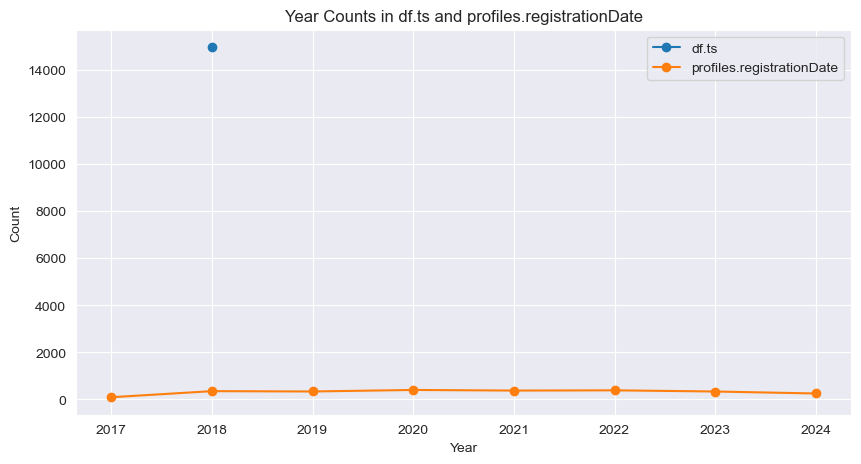

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract year using regex
df_ts_4 = df['ts'].str.extract(r'(\d{4})')
profiles_registration_4 = profiles['registration'].str.extract(r'(\d{4})')

# Drop NaNs
df_ts_4.dropna(inplace=True)
profiles_registration_4.dropna(inplace=True)

# Convert extracted years to integers
df_ts_4 = df_ts_4[0].astype(int).value_counts().sort_index()
profiles_registration_4 = profiles_registration_4[0].astype(int).value_counts().sort_index()

# Plot the counts
plt.figure(figsize=(10, 5))

plt.plot(df_ts_4.index, df_ts_4.values, label='df.ts', marker='o')
plt.plot(profiles_registration_4.index, profiles_registration_4.values, label='profiles.registrationDate', marker='o')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Year Counts in df.ts and profiles.registrationDate')
plt.legend()
plt.grid(True)
plt.show()

So, all `connections`/`processes` have 2018 year, where in turns, `profiles` registration date is spacely divided from 2017-2024.

So the next analyze (yet TODO) will be provided only with current `df` (`connections`&`processes`) that are also have `mwra` direct relation. 

Let's find a correlation between those attributes:

In [68]:
import seaborn as sns

In [ ]:
sns.pairplot(df)
plt.show()

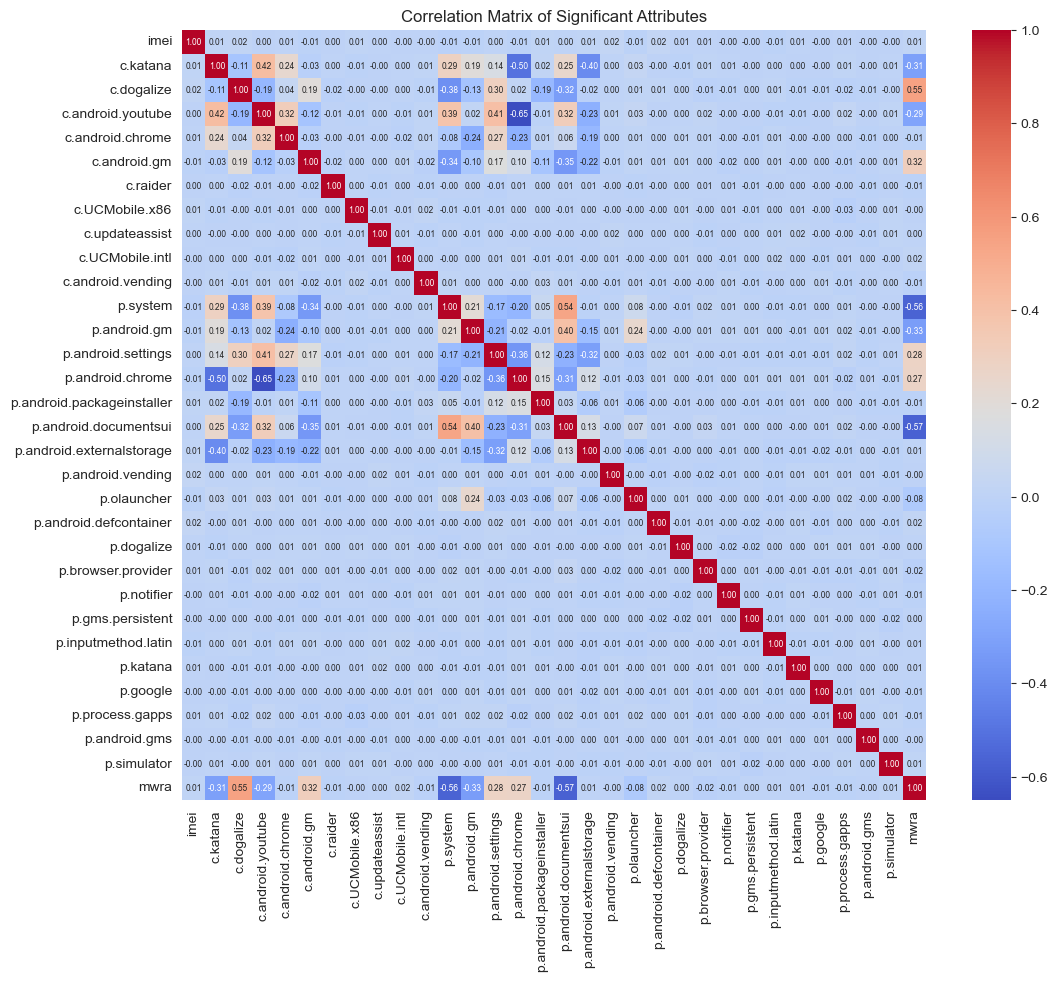


Non-Negligible Correlation of attributes with 'mwra':
p.android.documentsui: -0.57 (Moderate correlation, Negative)
p.system: -0.56 (Moderate correlation, Negative)
p.android.gm: -0.33 (Moderate correlation, Negative)
c.katana: -0.31 (Moderate correlation, Negative)
c.android.youtube: -0.29 (Weak correlation, Negative)
p.android.chrome: 0.27 (Weak correlation, Positive)
p.android.settings: 0.28 (Weak correlation, Positive)
c.android.gm: 0.32 (Moderate correlation, Positive)
c.dogalize: 0.55 (Moderate correlation, Positive)
mwra: 1.00 (Strong correlation, Positive)


In [86]:
exclude_columns = ['imei', 'ts']

cols = [col for col in df if col not in exclude_columns]

# Fill missing values with median 
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

corr_matrix = df[numerical_cols].corr()

# Extract correlation of all features with 'mwra'
mwra_corr = corr_matrix['mwra']  # Remove self-correlation

# Display the correlations
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 6})
plt.title('Correlation Matrix of Significant Attributes')
plt.show()


# - _|0.00 - 0.10|: Negligible correlation_
# - _ | 0.10 - 0.30 |: Weak correlation_
# - _ | 0.30 - 0.50 |: Moderate correlation_
# - _ | 0.50 - 1.00 |: Strong correlation_

def categorize_correlation(corr_value):
    if corr_value == 0:
        return "No correlation"
    elif 0 < abs(corr_value) <= 0.1:
        return "Negligible correlation"
    elif 0.1 < abs(corr_value) <= 0.3:
        return "Weak correlation"
    elif 0.3 < abs(corr_value) <= 0.7:
        return "Moderate correlation"
    else:
        return "Strong correlation"


# Categorize and print correlations
print("\nNon-Negligible Correlation of attributes with 'mwra':")
for feature, corr_value in mwra_corr.items():
    correlation_type = categorize_correlation(corr_value)

    if correlation_type == "No correlation" or correlation_type == "Negligible correlation":
        continue

    sign = "Positive" if corr_value > 0 else "Negative"
    print(f"{feature}: {corr_value:.2f} ({correlation_type}, {sign})")

In [89]:
from scipy import stats

In [92]:
exclude_columns = ['imei', 'ts']

cols = [col for col in df if col not in exclude_columns]

# Fill missing values with median 
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Perform ANOVA for each numerical column against the target variable 'mwra'
anova_results = {}
for col in numerical_cols:
    if col != 'mwra':
        groups = [group[col].dropna().values for name, group in df.groupby('mwra')]
        f_val, p_val = stats.f_oneway(*groups)
        anova_results[col] = (f_val, p_val)

# Categorize and print significant ANOVA results
def categorize_p_value(p_value):
    if p_value < 0.01:
        return "Highly significant"
    elif p_value < 0.05:
        return "Significant"
    else:
        return "Not significant"


print("\nSignificant ANOVA Results:")
for feature, (f_val, p_val) in anova_results.items():
    significance = categorize_p_value(p_val)
    if significance != "Not significant":
        print(f"{feature}: F-value = {f_val:.2f}, p-value = {p_val:.2e} ({significance})")


Significant ANOVA Results:
c.katana: F-value = 1615.66, p-value = 0.00e+00 (Highly significant)
c.dogalize: F-value = 6654.43, p-value = 0.00e+00 (Highly significant)
c.android.youtube: F-value = 1421.27, p-value = 3.18e-297 (Highly significant)
c.android.gm: F-value = 1667.96, p-value = 0.00e+00 (Highly significant)
c.UCMobile.intl: F-value = 3.92, p-value = 4.78e-02 (Significant)
p.system: F-value = 6893.81, p-value = 0.00e+00 (Highly significant)
p.android.gm: F-value = 1782.89, p-value = 0.00e+00 (Highly significant)
p.android.settings: F-value = 1285.71, p-value = 3.29e-270 (Highly significant)
p.android.chrome: F-value = 1195.26, p-value = 4.70e-252 (Highly significant)
p.android.documentsui: F-value = 7125.43, p-value = 0.00e+00 (Highly significant)
p.olauncher: F-value = 85.62, p-value = 2.47e-20 (Highly significant)
p.browser.provider: F-value = 6.54, p-value = 1.06e-02 (Significant)


So, those attributes we will name as "významné" due to having big impact on `mwra`.

In [96]:
significant_attributes = [
    "c.katana",
    "c.dogalize",
    "c.android.youtube",
    "c.android.gm",
    "c.UCMobile.intl",
    "p.system",
    "p.android.gm",
    "p.android.settings",
    "p.android.chrome",
    "p.android.documentsui",
    "p.olauncher",
    "p.browser.provider",
    "p.android.documentsui",
    "p.system",
    "p.android.gm",
    "c.katana",
    "c.android.youtube",
    "p.android.chrome",
    "p.android.settings",
    "c.android.gm",
    "c.dogalize",
]

#### 1.1.B Analysis of individual attributes: for the selected significant attributes (min 10), analyse their distributions and basic descriptive statistics.


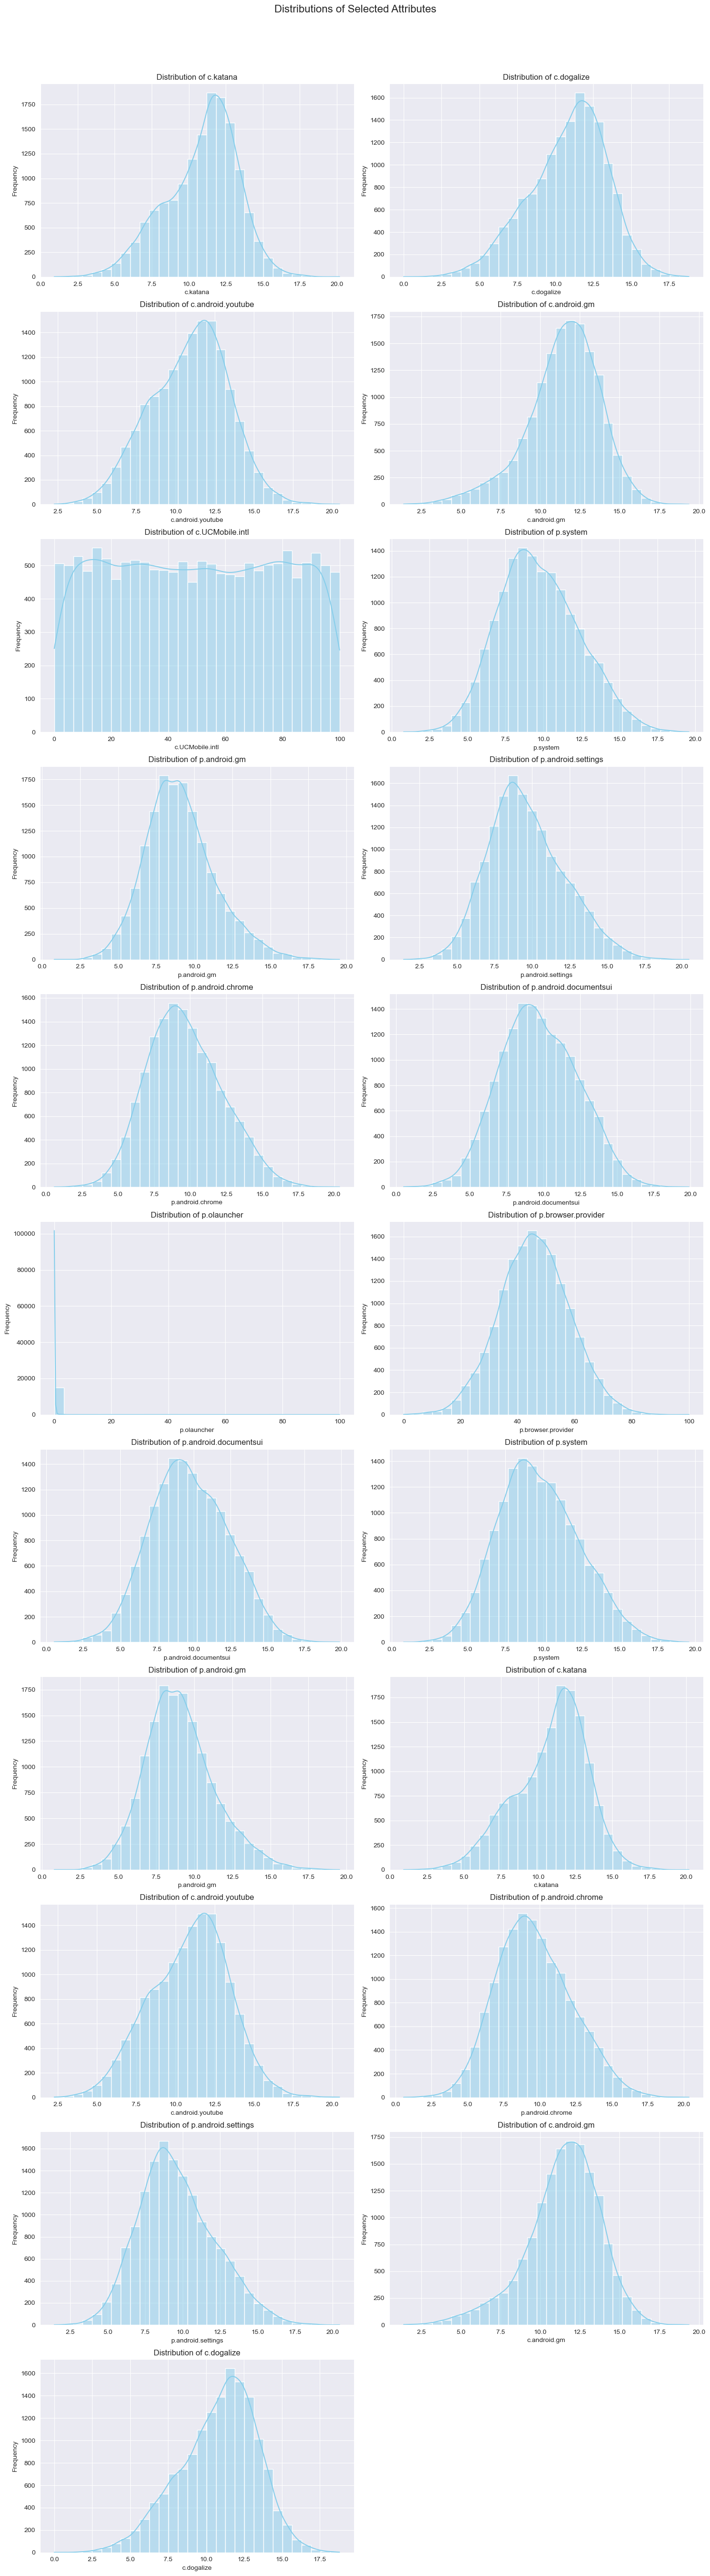

In [97]:
num_attrs = len(significant_attributes)
ncols = 2
nrows = (num_attrs + ncols - 1) // ncols  # Ceiling division to determine rows

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
axes = axes.flatten()  # Flatten in case of multiple rows

# Plot each attribute
for i, attr in enumerate(significant_attributes):
    sns.histplot(df[attr], kde=True, bins=30, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {attr}')
    axes[i].set_xlabel(attr)
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust the layout and add a main title
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.suptitle(f'Distributions of Selected Attributes', fontsize=16)

plt.show()

Descriptive Statistics:
            c.katana    c.dogalize  c.android.youtube  c.android.gm  \
count  14975.000000  14975.000000       14975.000000  14975.000000   
mean      10.891413     10.821116          10.901059     11.439875   
std        2.439345      2.566717           2.497378      2.325603   
min        0.918820      0.000000           2.264730      1.381360   
25%        9.328530      9.188920           9.136625     10.164235   
50%       11.289100     11.146840          11.112420     11.666780   
75%       12.600205     12.635725          12.655210     13.000745   
max       20.186330     18.811470          20.479240     19.376290   

       c.UCMobile.intl      p.system  p.android.gm  p.android.settings  \
count     14975.000000  14975.000000  14975.000000        14975.000000   
mean         49.857326      9.729870      9.083810            9.642274   
std          29.025019      2.643675      2.295064            2.536002   
min           0.000000      0.792110      0.7970

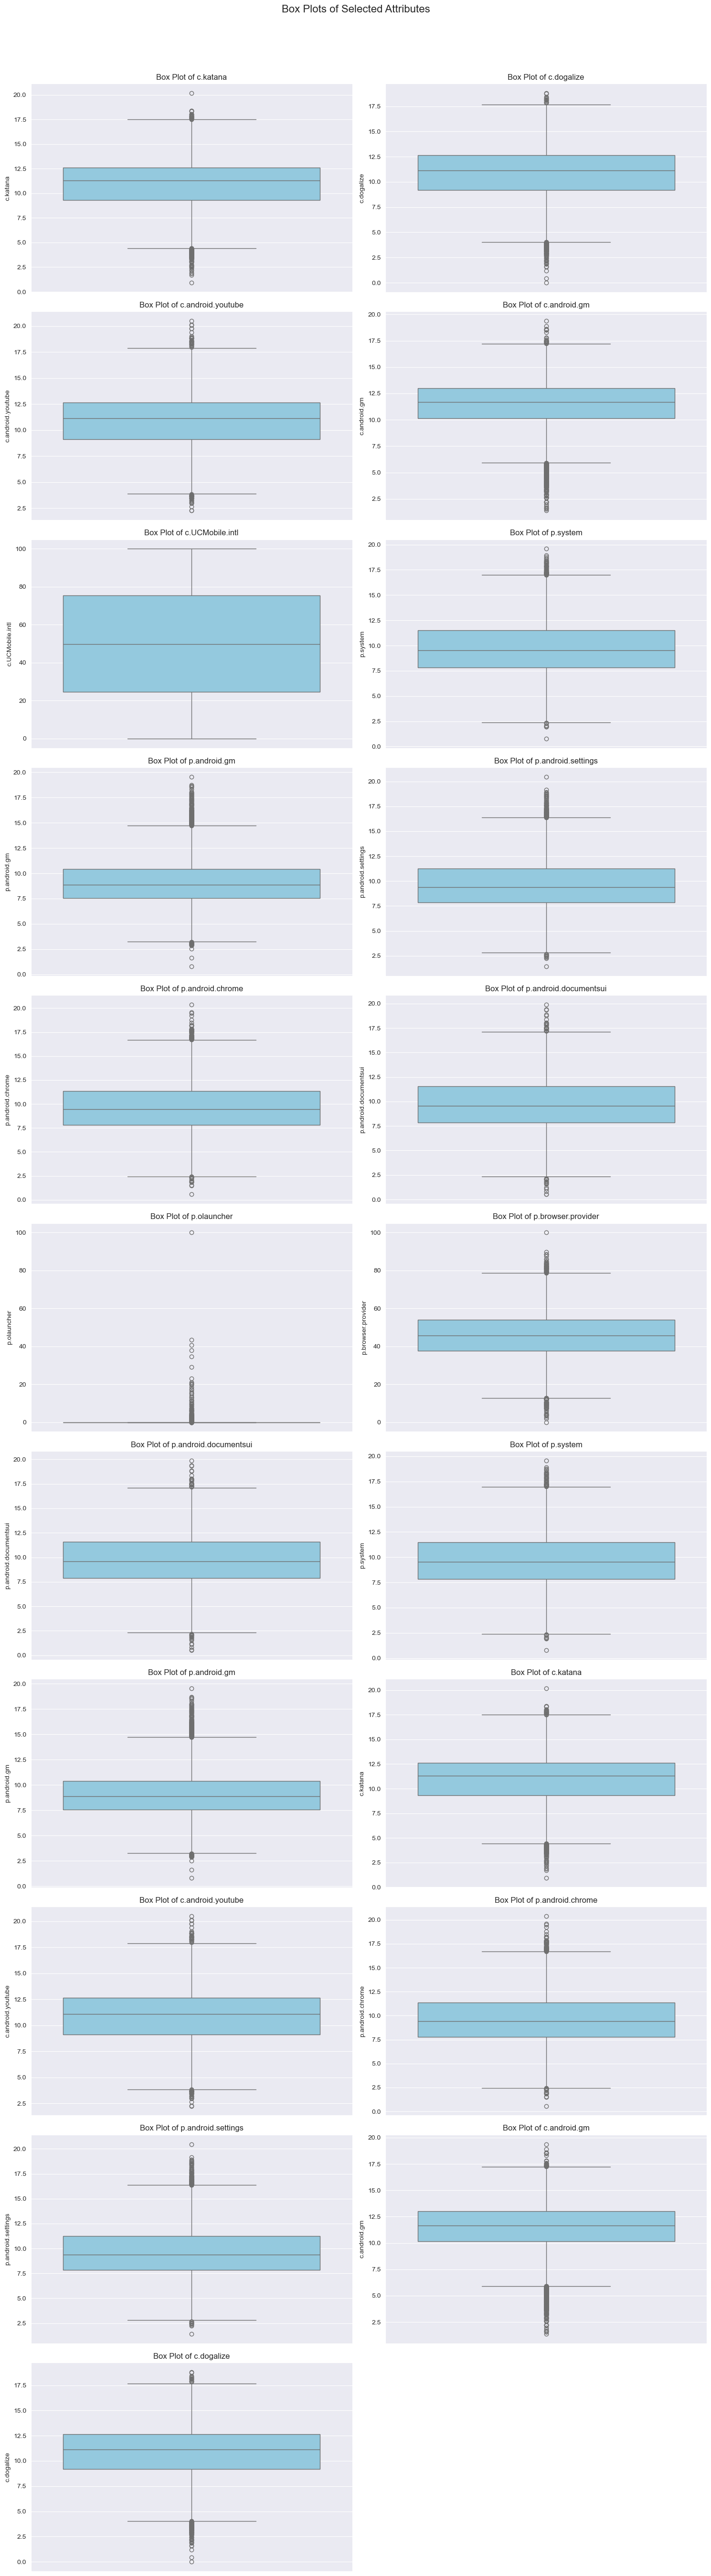

In [98]:
# Calculate descriptive statistics for significant attributes
descriptive_stats = df[significant_attributes].describe()
print("Descriptive Statistics:\n", descriptive_stats)

# Plot box plots for significant attributes
num_attrs = len(significant_attributes)
ncols = 2
nrows = (num_attrs + ncols - 1) // ncols  # Ceiling division to determine rows

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
axes = axes.flatten()  # Flatten in case of multiple rows

# Plot each attribute
for i, attr in enumerate(significant_attributes):
    sns.boxplot(y=df[attr], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Box Plot of {attr}')
    axes[i].set_ylabel(attr)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust the layout and add a main title
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.suptitle(f'Box Plots of Selected Attributes', fontsize=16)

plt.show()

In [109]:
from scipy.stats import skew, kurtosis

# Skewness and Kurtosis
skewness = df[significant_attributes].apply(skew).rename('Skewness')
kurt = df[significant_attributes].apply(kurtosis).rename('Kurtosis')
distribution_stats = pd.concat([skewness, kurt], axis=1)
print("Skewness and Kurtosis:\n", distribution_stats)

Skewness and Kurtosis:
                         Skewness     Kurtosis
c.katana               -0.450813     0.001189
c.dogalize             -0.415808    -0.014469
c.android.youtube      -0.165632    -0.189526
c.android.gm           -0.641131     0.770616
c.UCMobile.intl         0.006196    -1.221943
p.system                0.266403    -0.219344
p.android.gm            0.505848     0.474194
p.android.settings      0.394443    -0.036742
p.android.chrome        0.286975    -0.140748
p.android.documentsui   0.115085    -0.271046
p.olauncher            44.689612  2884.646948
p.browser.provider      0.019226     0.029890
p.android.documentsui   0.115085    -0.271046
p.system                0.266403    -0.219344
p.android.gm            0.505848     0.474194
c.katana               -0.450813     0.001189
c.android.youtube      -0.165632    -0.189526
p.android.chrome        0.286975    -0.140748
p.android.settings      0.394443    -0.036742
c.android.gm           -0.641131     0.770616
c.dogalize

### 1.2

#### 1.2.A

As described in the previous steps, we've already removed holistic duplicates. And duplicate stems after merge.

The incorrect format is in multiple columns, like:

- `profiles.current_location` (`(Decimal('-84.5302895'), Decimal('173.686383'))`)
    - instead of `devices.latitute/longtitude` where coords are stored as float in different columns.